In [1]:
import numpy as np
from scipy.integrate import RK45,LSODA,solve_ivp
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(["science", "russian-font", "grid"])

#  **Подготовка:**

$$
    \frac{d^2}{dx^2} y(x) + a_2 f_2(x) \frac{d}{dx} y(x) + a_1 f_1(x) y(x) = a_0 f_0(x),
$$
$$
    \begin{cases}
       \left. \frac{d}{dx} y(x) \right\vert_{x = 0} = 1, \\
       y(0) = 1 
    \end{cases}, \quad x \in [0, 10].
$$

Преобразуем данное дифференциальное уравнение к следующему виду:
1. Введем новую переменную $z = \frac{dy}{dx}$, тогда
$$ \frac{d}{dx}z(x) + a_2 f_2(x) z(x) + a_1 f_1(x) y(x) = a_0 f_0(x), \quad
    \begin{cases}
        z \vert_{x = 0} = z_0, \\
        y(0) = y_0
    \end{cases}.
$$
Получаем следующую систему уравнений:
$$
    \begin{cases}
        \frac{d}{dx}y(x) = z(x), \quad y(0) = y_0, \\
        \frac{d}{dx}z(x) = F(x, y, z), \quad z(0) = z_0
    \end{cases}.
$$




2. Введем вектор-функцию $Y$
$$
    Y(x) = \begin{bmatrix}
        z(x) \\ y(x)
    \end{bmatrix}, \quad
    \frac{dY}{dx} =  \mathfrak{F}(x, Y) = \begin{bmatrix}
         F(x, y, z) \\ z(x)
    \end{bmatrix}, \quad F(x, y, z) = a_0 f_0(x) - a_1 f_1(x) y(x) - a_2 f_2(x) z(x).
$$

3. Перейдем к следующей системе уравнений
$$
    \boxed{\begin{cases}
        \frac{d}{dx}Y = \mathfrak{F}(x, Y), \\
        Y(X_0) = Y_0
    \end{cases}}
$$

# Решение:

In [2]:
# Вариант 12
# Пусть a2 = 1, иначе вариант получится слишком скучным
a = [1, 1, 1]
f = lambda x_arg: [1, x_arg**2, 1]
F = lambda x_arg, y_arg: np.array([
    -1 * (
        a[2] * f(x_arg)[2] * y_arg[0] + 
        a[1] * f(x_arg)[1] * y_arg[1]
    ) + 
    a[0] * f(x_arg)[0], 
    y_arg[0]
])

# Начальные условия
Y0 = np.array([1, 1])
x0 = 0
xEnd = 10

N = 1000
Nf = [N, 2 * N, 10 * N]
h = (x0 + xEnd) / N

In [3]:
def euler(func, y0, x0, xEnd, dx):
    _x = np.arange(x0, xEnd, dx)
    _y = np.zeros([len(_x), len(y0)])
    
    _y[0] = y0
    for i in range(1, len(_x)):
        _y[i] = _y[i - 1] + func(_x[i - 1], _y[i - 1]) * dx
    return _y

In [4]:
x_space = np.linspace(x0, xEnd, 11)

In [5]:
COLOR1 = "tab:blue"
COLOR2 = "tab:orange"

## Метод Эйлера

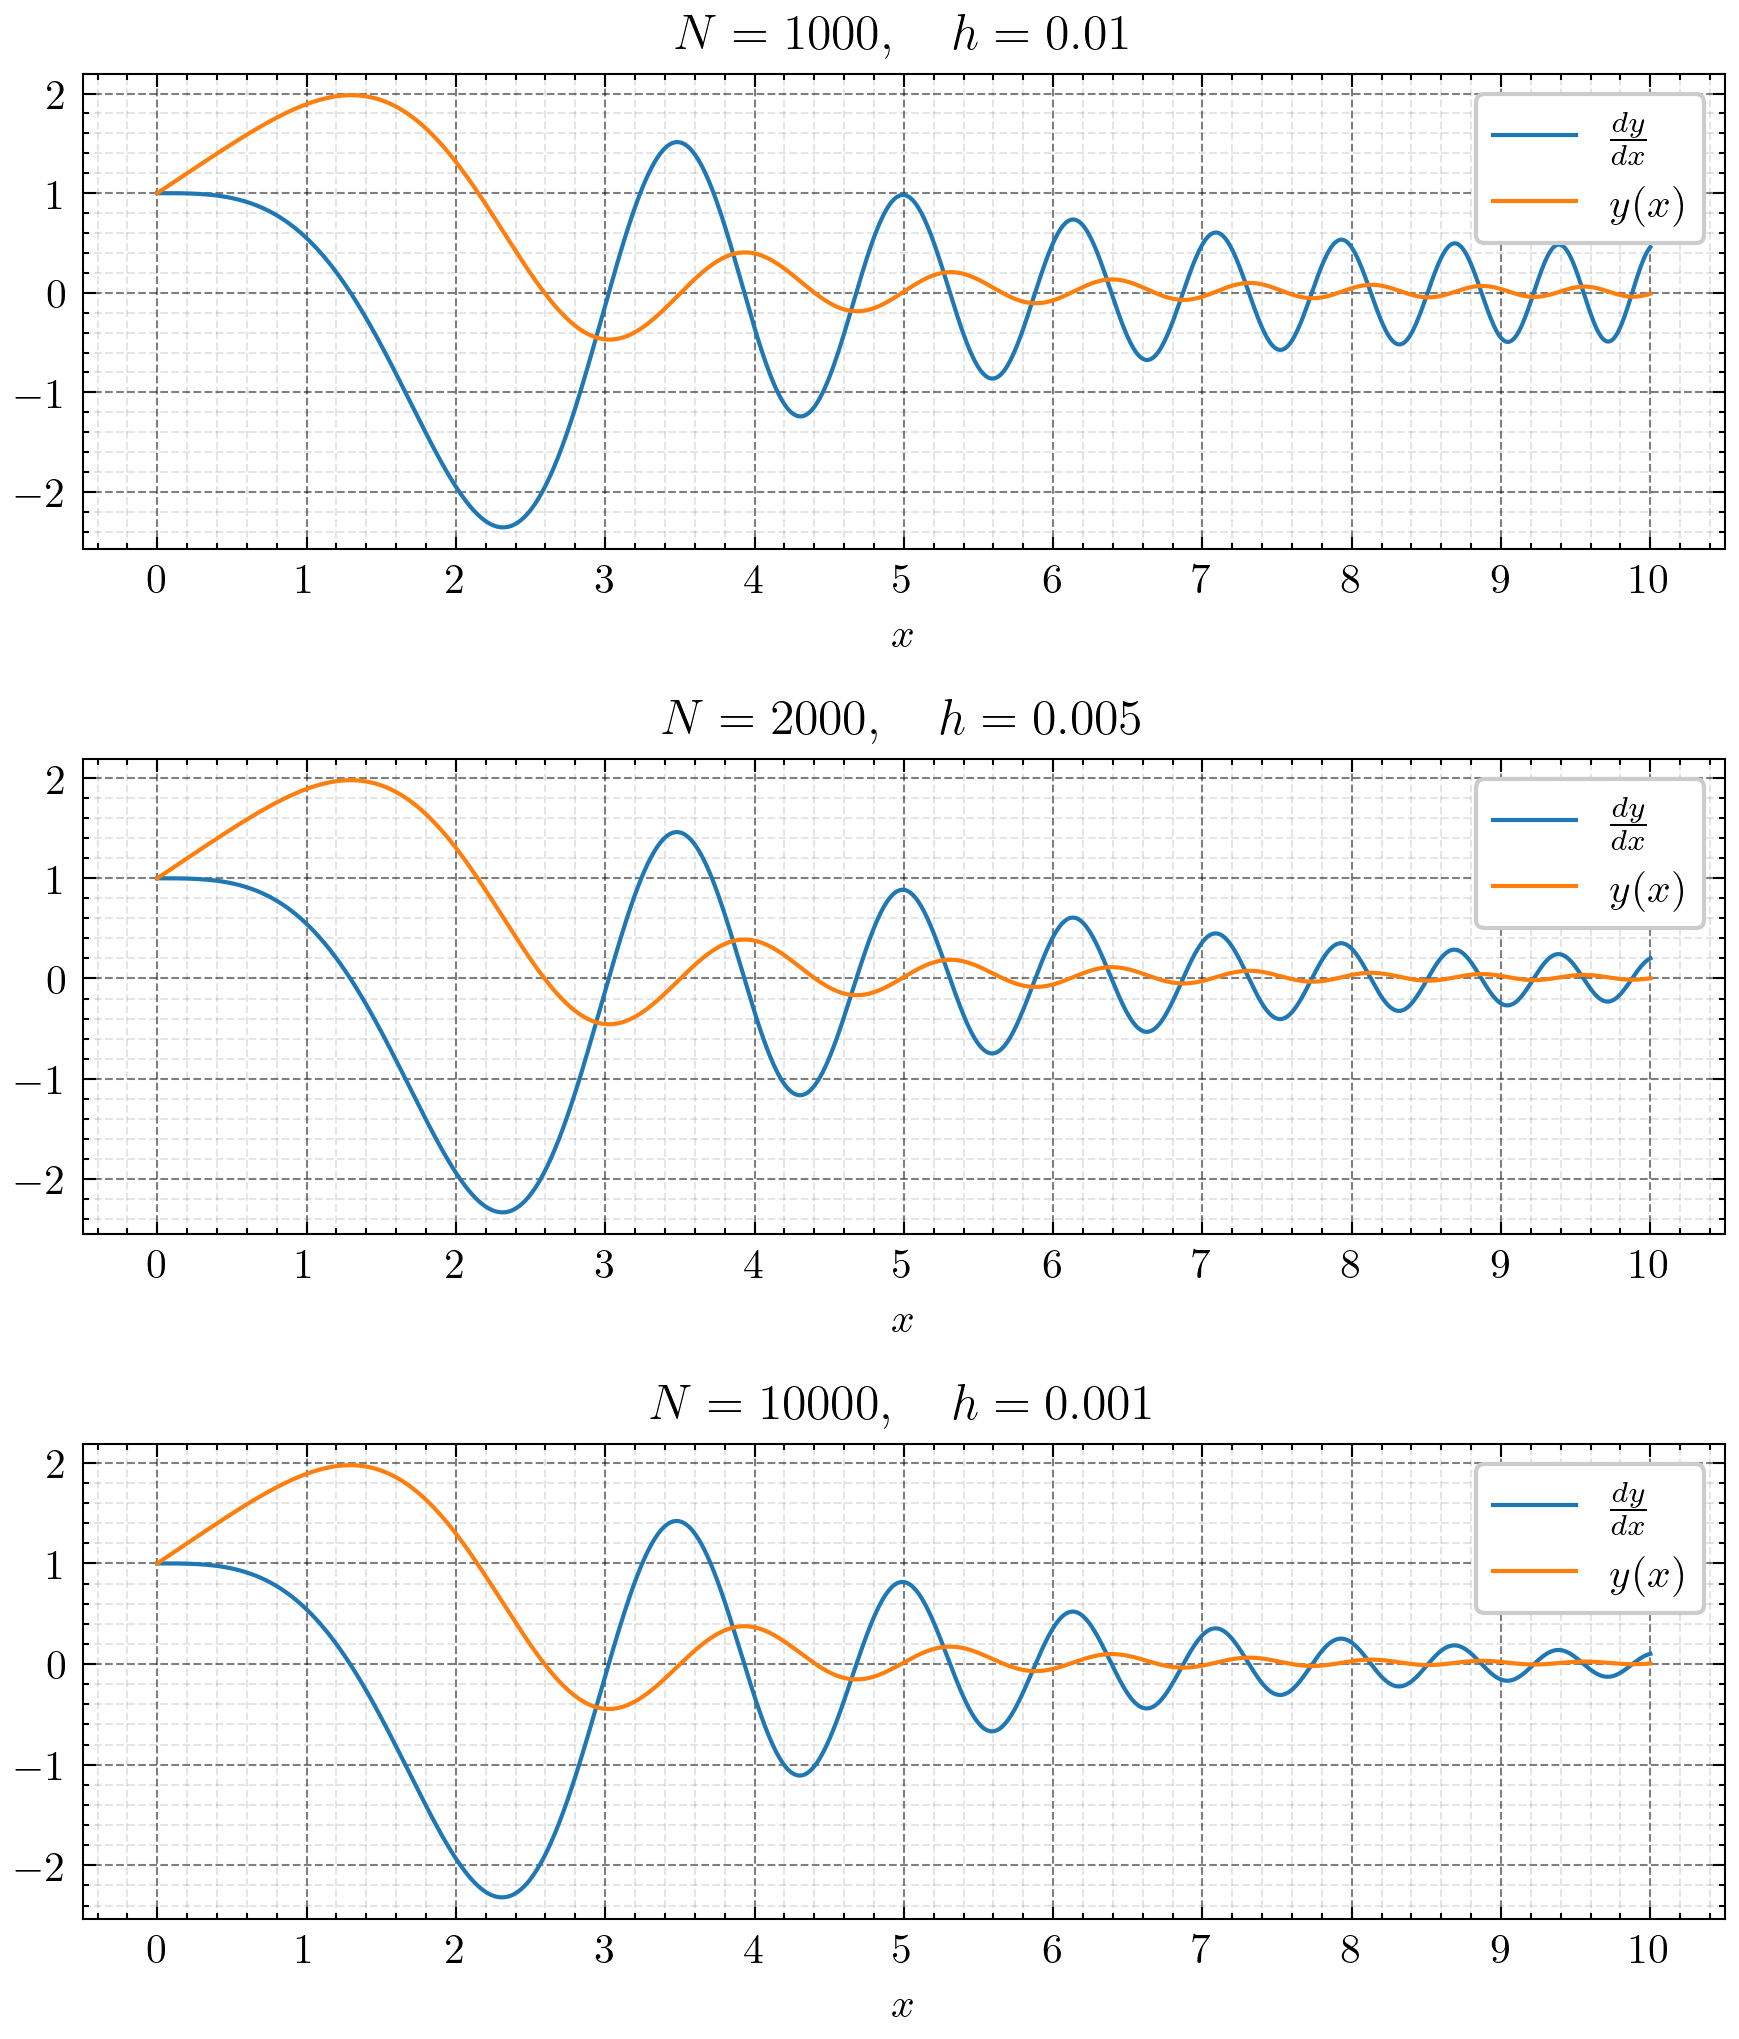

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(6, 7), dpi = 300)
for i in range(3):
    # Решение методом Эйлера
    x = np.linspace(x0, xEnd, Nf[i])
    solutionEuler = euler(F, Y0, x0, xEnd, (x0 + xEnd) / Nf[i])
    
    # Визуализация
    ax[i].set_title(rf'$N = {Nf[i]},\quad h = {(x0 + xEnd) / Nf[i]}$')
    ax[i].set_xlabel('$x$')
    ax[i].set_xticks(x_space)
    ax[i].grid(True, which = "major")
    ax[i].grid(True, which = "minor", alpha = 0.1)
    
    ax[i].plot(
        x, solutionEuler[[[e] for e in np.arange(len(x))], 0],
        label= r'$\frac{dy}{dx}$',
        color = COLOR1
    )
    ax[i].plot(
        x, solutionEuler[[[e] for e in np.arange(len(x))], 1],
        label= r'$y(x)$',
        color = COLOR2
    )
    ax[i].legend()

fig.tight_layout()
plt.show()

## Метод Рунге-Кутты 4-го порядка точности

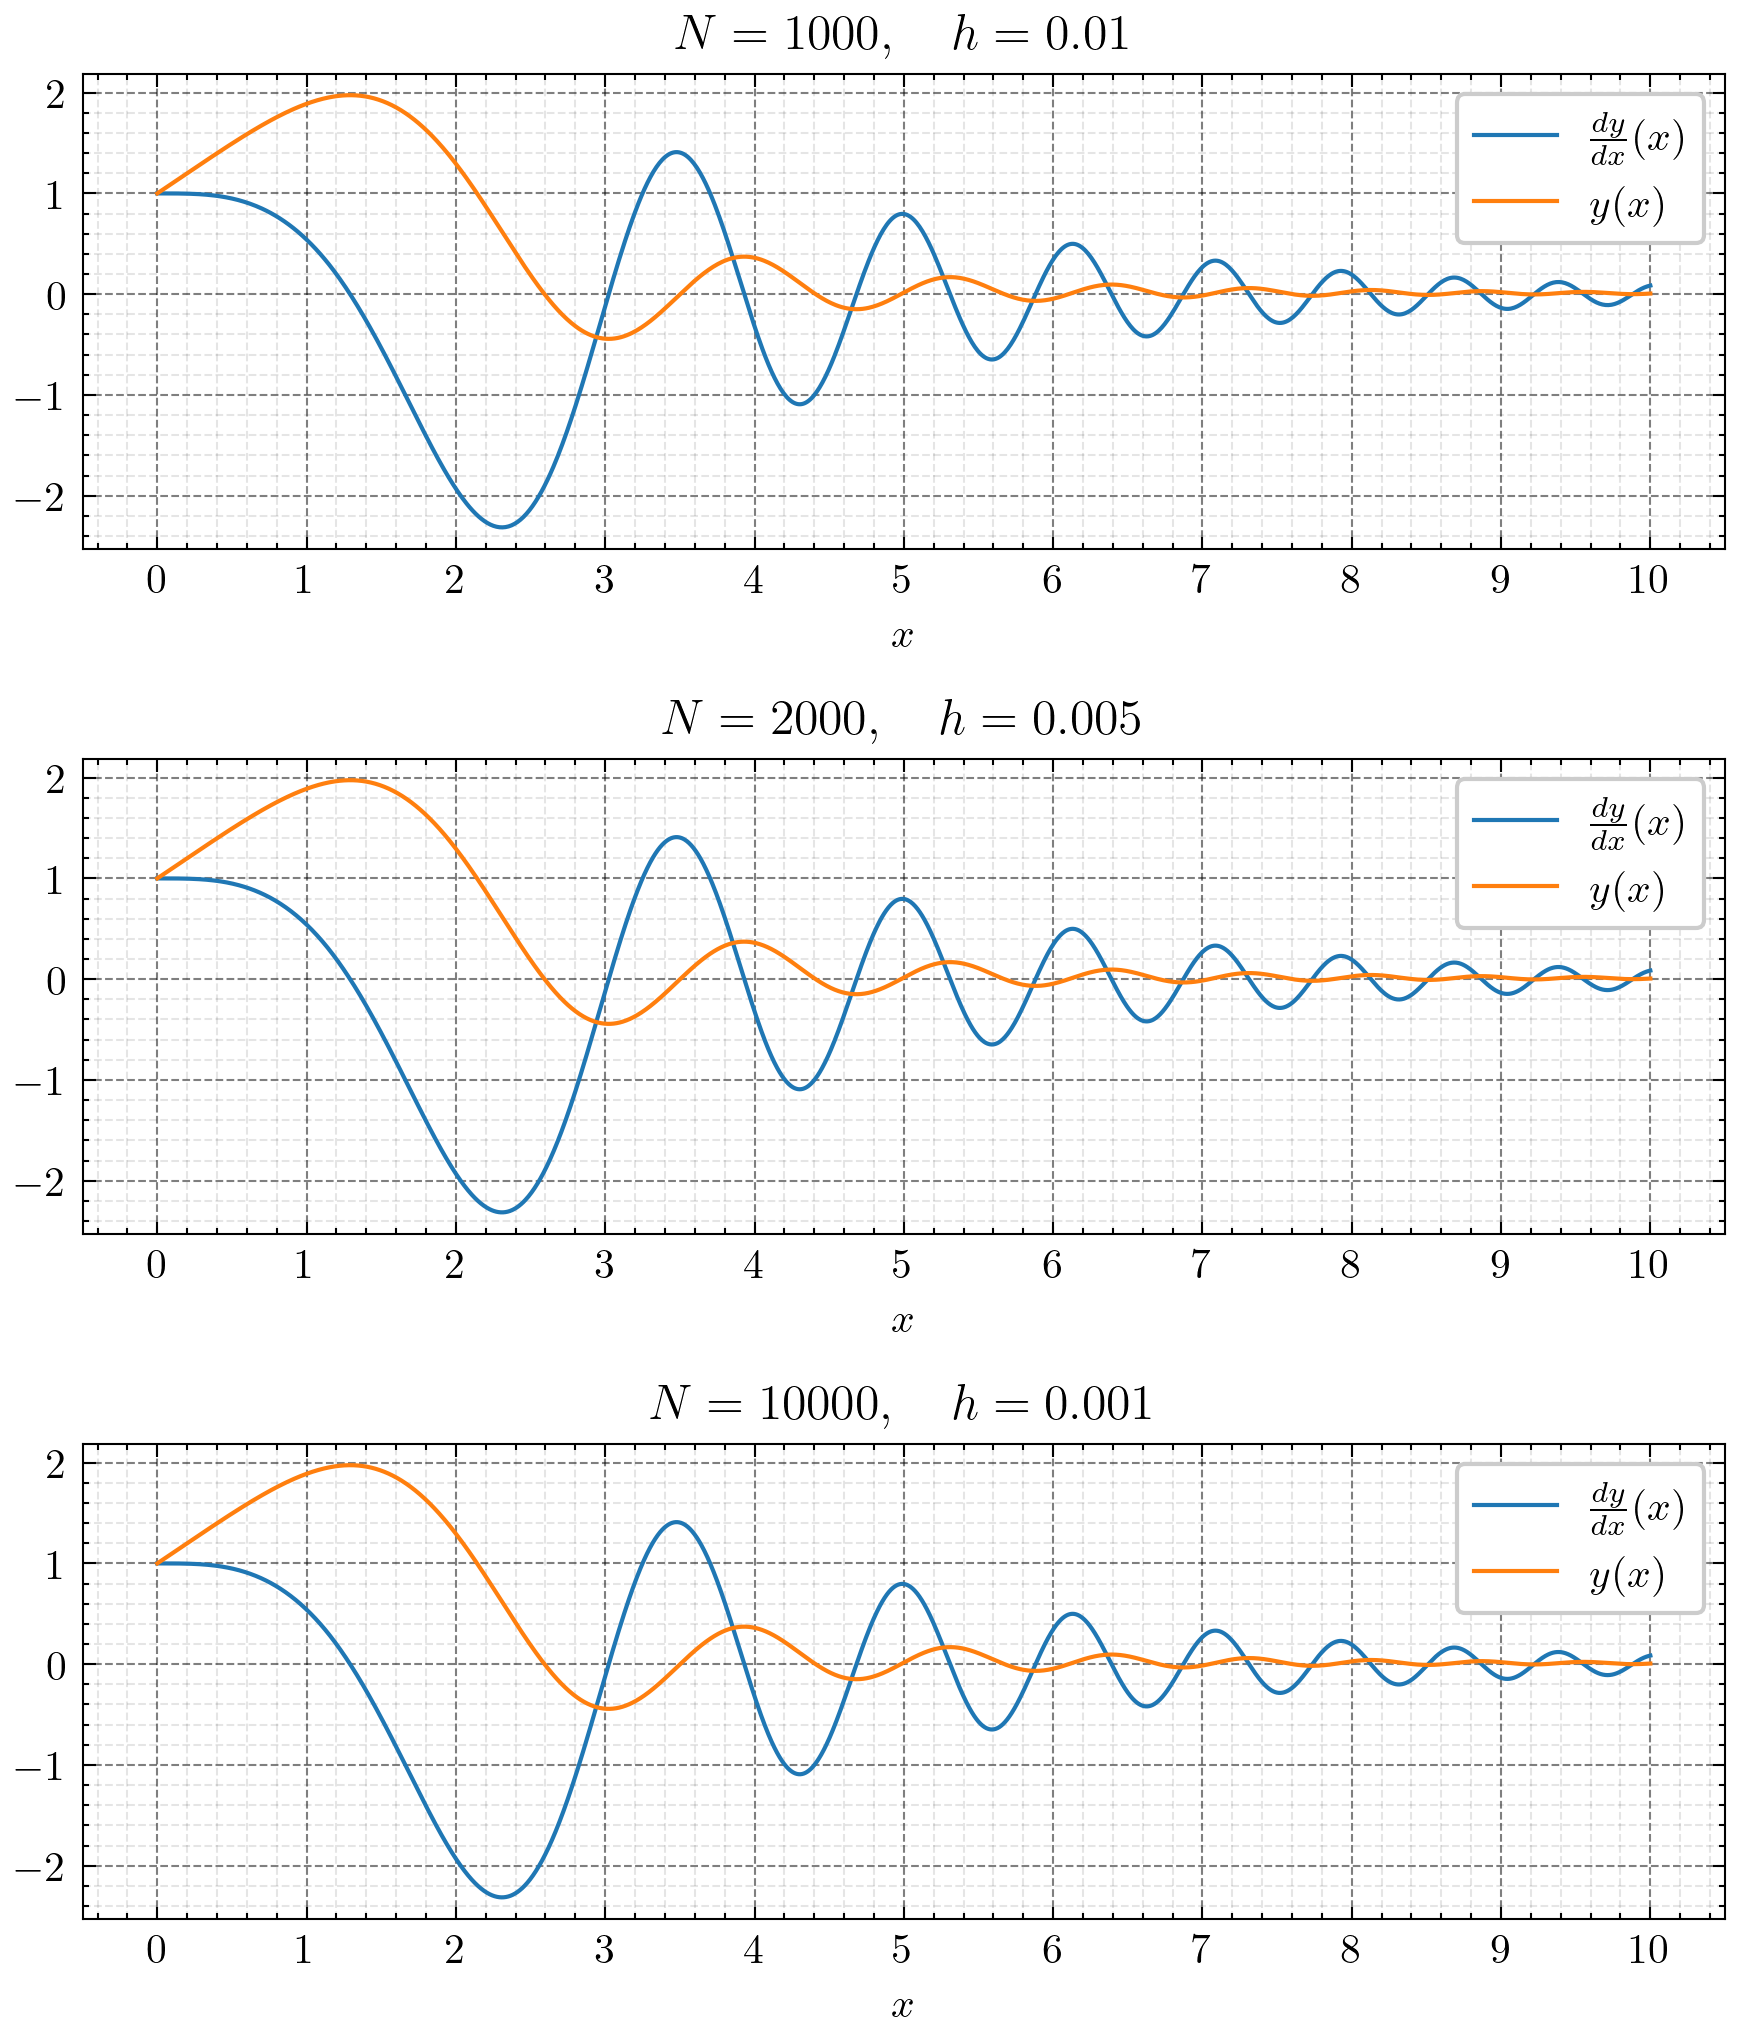

In [7]:
fig, ax = plt.subplots(3, 1, figsize = (6, 7), dpi = 300)
for i in range(3):
    # Решение методом Рунге-Кутты
    x = np.linspace(x0, xEnd, Nf[i])
    solutionRunge = solve_ivp(
        F, (x0, xEnd), Y0,
        method = 'RK45',
        t_eval = x, vectorized = True
    )
    
    # Визуализация
    ax[i].set_title(rf'$N = {Nf[i]},\quad h = {(x0 + xEnd) / Nf[i]}$')
    ax[i].set_xlabel('$x$')
    ax[i].set_xticks(x_space)
    ax[i].grid(True, which = "major")
    ax[i].grid(True, which = "minor", alpha = 0.1)
    
    ax[i].plot(
        x, solutionRunge.y[0],
        label = r'$\frac{dy}{dx}(x)$', 
        color = COLOR1
    )
    ax[i].plot(
        x, solutionRunge.y[1],
        label = r'$y(x)$',
        color = COLOR2
    )
    ax[i].legend()
    
fig.tight_layout()
plt.show()

## Метод Адамса

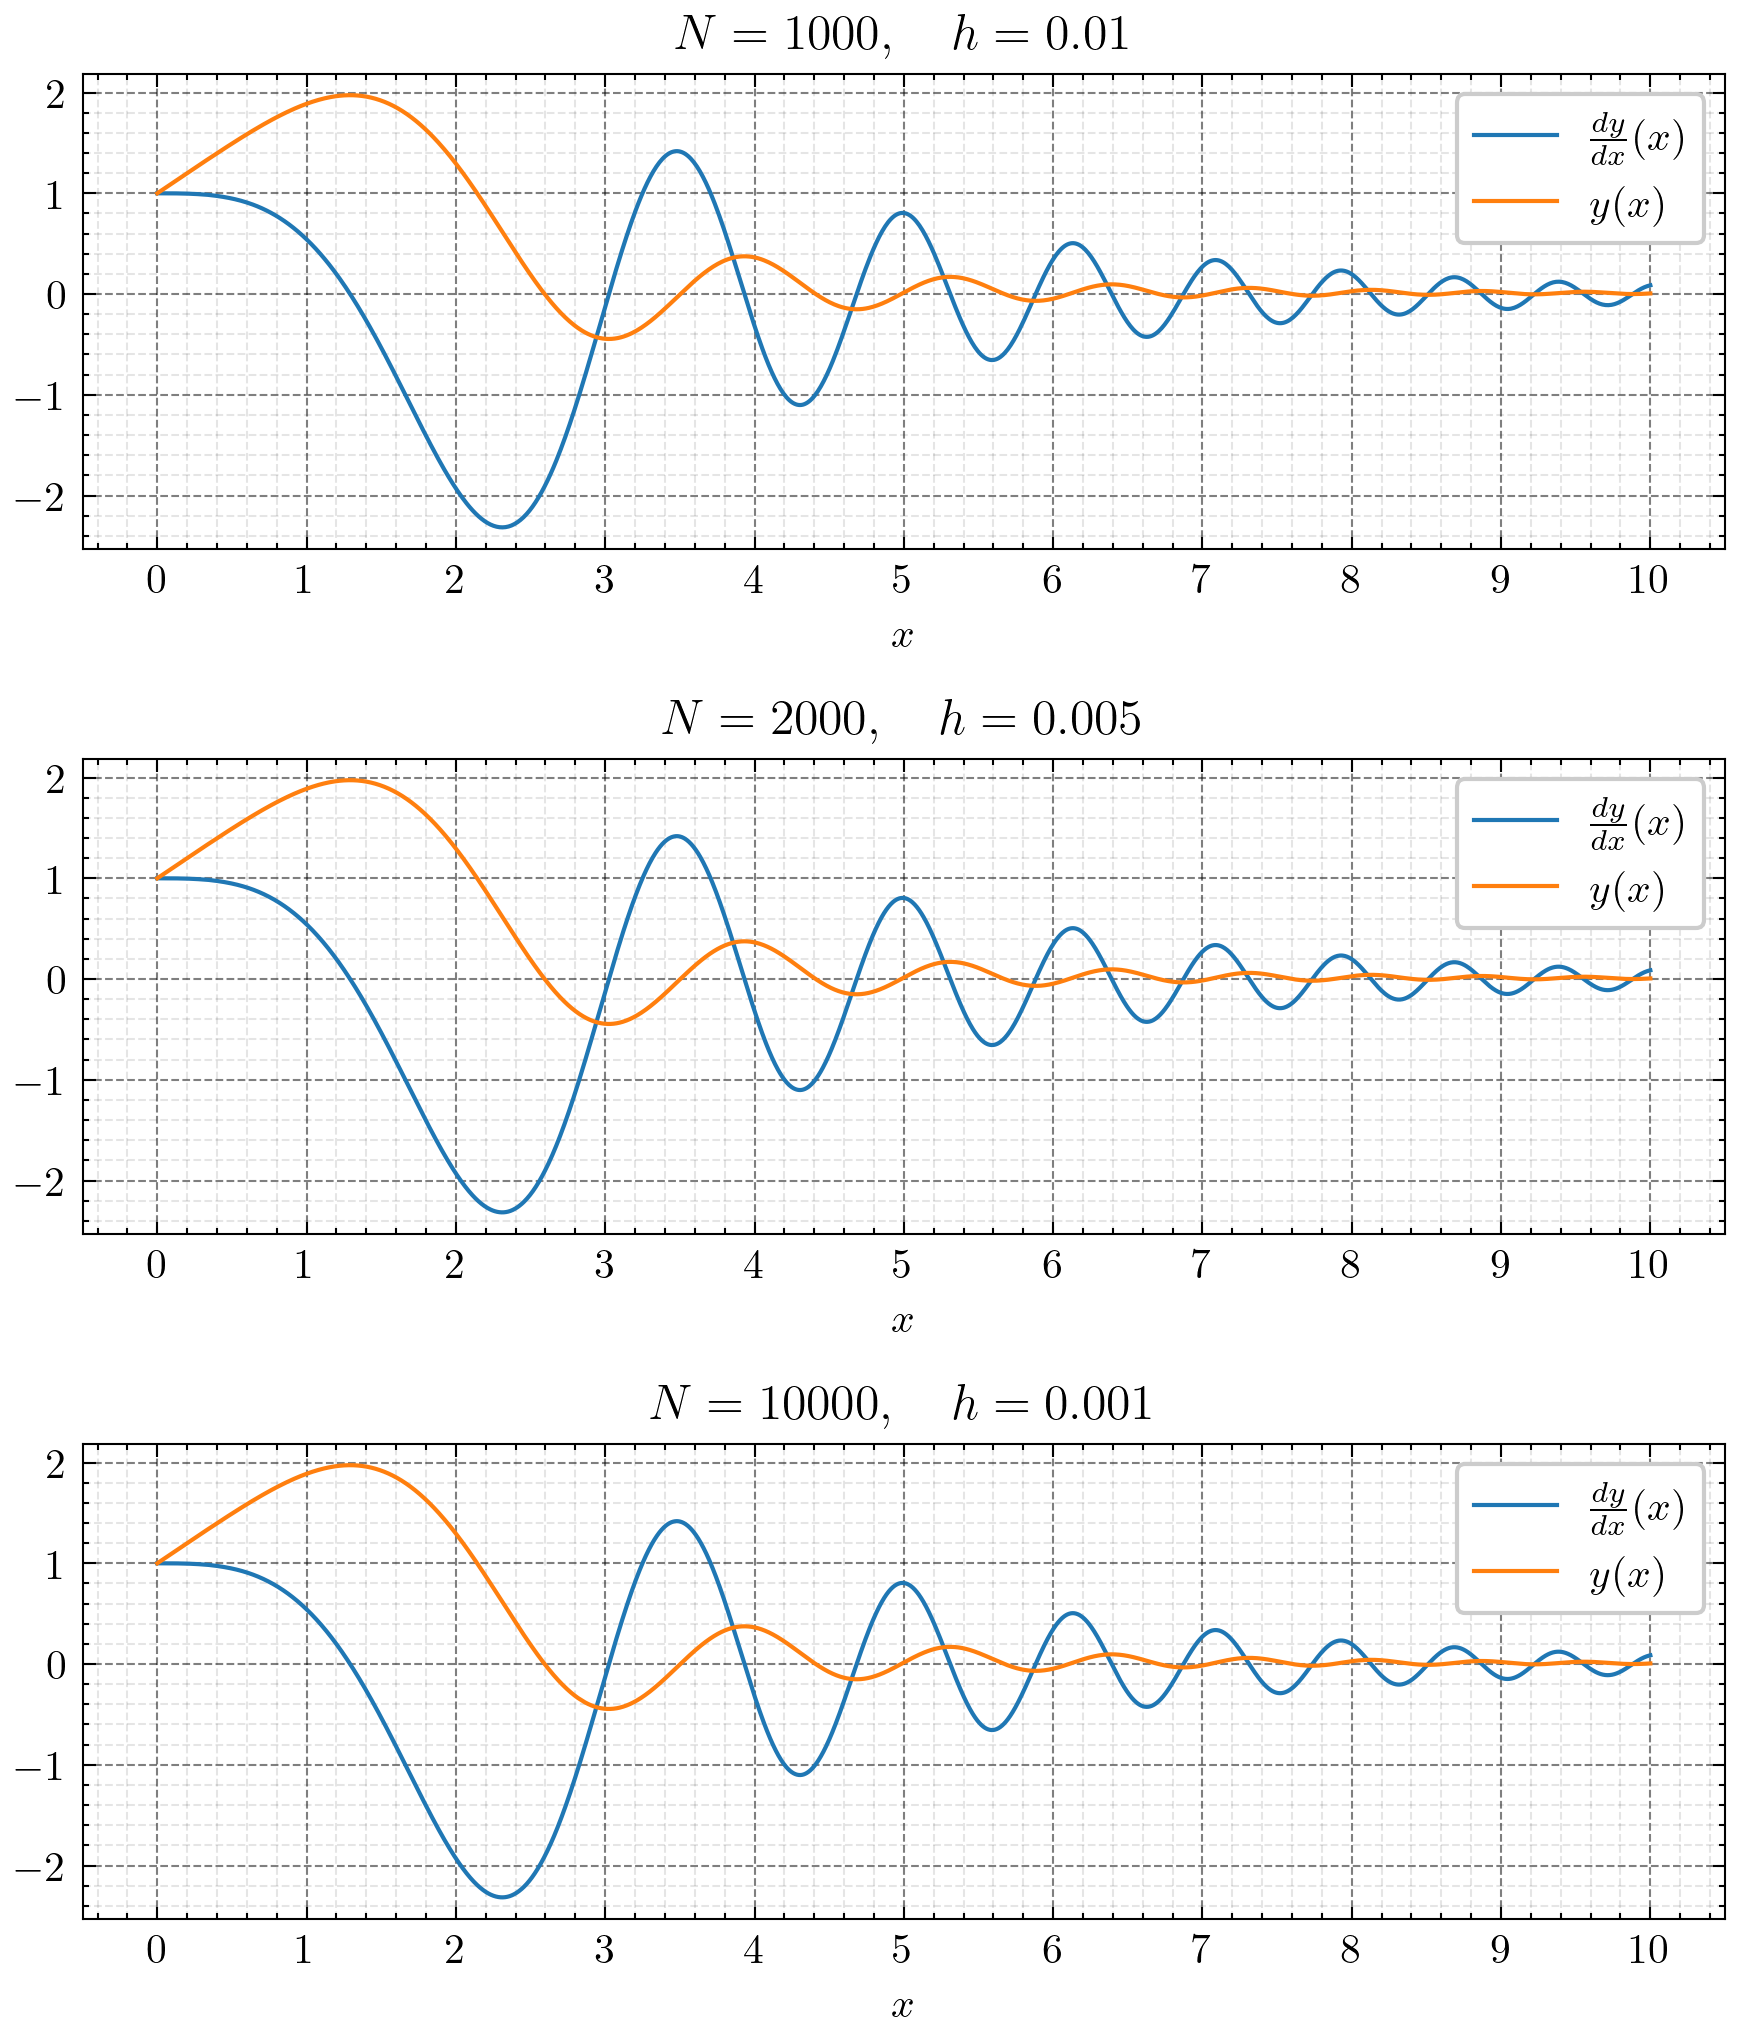

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(6, 7), dpi = 300)
for i in range(3):
    # Решение методом Адамса
    x = np.linspace(x0, xEnd, Nf[i])
    solutionAdams = solve_ivp(
        F, (x0, xEnd), Y0,
        method = 'LSODA', 
        t_eval = x, vectorized = True
    )
    
    # Визуализация
    ax[i].set_title(rf'$N = {Nf[i]},\quad h = {(x0 + xEnd) / Nf[i]}$')
    ax[i].set_xlabel('$x$')
    ax[i].set_xticks(x_space)
    ax[i].grid(True, which = "major")
    ax[i].grid(True, which = "minor", alpha = 0.1)
    
    ax[i].plot(
        x, solutionAdams.y[0],
        label = r'$\frac{dy}{dx}(x)$',
        color = COLOR1
    )
    ax[i].plot(
        x, solutionAdams.y[1],
        label = r'$y(x)$',
        color = COLOR2
    )
    ax[i].legend()
    
fig.tight_layout()
plt.show()